## 引用需要用到的代码库

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

## 从yahoo finance获取德方纳米过去30天的日交易数据

In [3]:
from pandas_datareader import data as pdr
# 将yahoo finance下载的数据格式设为Pandas Dataframe
yf.pdr_override()

dfnm = pdr.get_data_yahoo("300769.SZ", start="2021-09-23", end="2021-10-23")
dfnm.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01
mean,484.012947,508.017646,464.528825,482.948235,482.948235,2.340012e+06
std,40.120939,42.107419,41.391273,40.202608,40.202608,5.361252e+05
min,426.500000,431.890015,408.910004,425.190002,425.190002,1.275645e+06
25%,450.100006,488.880005,431.000000,443.950012,443.950012,2.114860e+06
50%,485.010010,507.339996,459.000000,485.000000,485.000000,2.343222e+06
75%,510.010010,545.000000,496.000000,514.539978,514.539978,2.582248e+06
max,549.460022,575.000000,538.000000,544.020020,544.020020,3.796977e+06


## 一行代码生成常规股票走势图

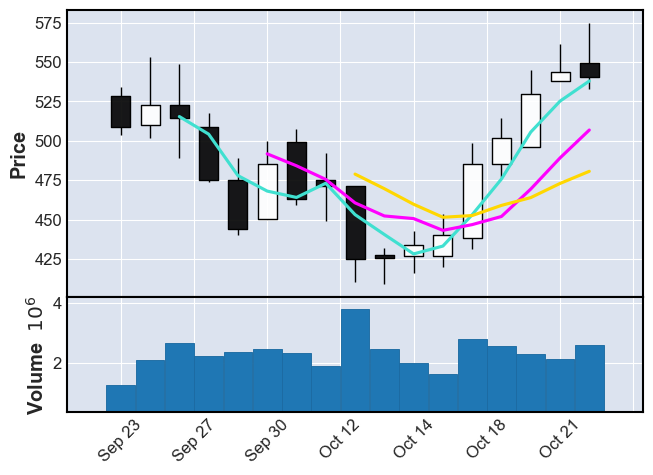

In [9]:
mpf.plot(dfnm,type='candle',mav=(3,6,9),volume=True)

## 自己画Candlestick图表，可以随意个性化

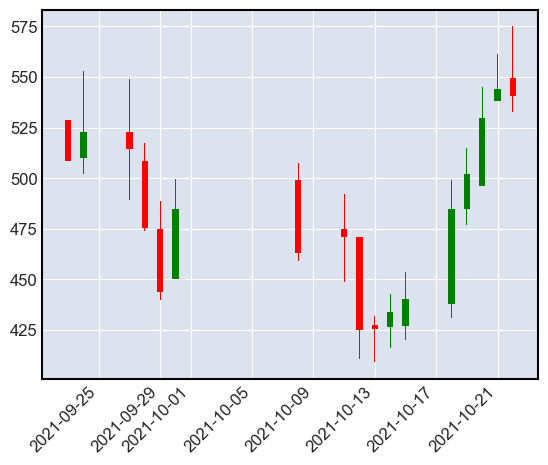

In [26]:
# https://www.statology.org/matplotlib-python-candlestick-chart/

#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = dfnm[dfnm['Close']>=dfnm['Open']]
down = dfnm[dfnm['Close']<dfnm['Open']]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up["Close"]-up["Open"],width,bottom=up["Open"],color=col1)
plt.bar(up.index,up["High"]-up["Close"],width2,bottom=up["Close"],color=col1)
plt.bar(up.index,up["Low"]-up["Open"],width2,bottom=up["Open"],color=col1)

#plot down prices
plt.bar(down.index,down["Close"]-down["Open"],width,bottom=down["Open"],color=col2)
plt.bar(down.index,down["High"]-down["Open"],width2,bottom=down["Open"],color=col2)
plt.bar(down.index,down["Low"]-down["Close"],width2,bottom=down["Close"],color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

## 在生成的图表中画线或添加其他数据图表

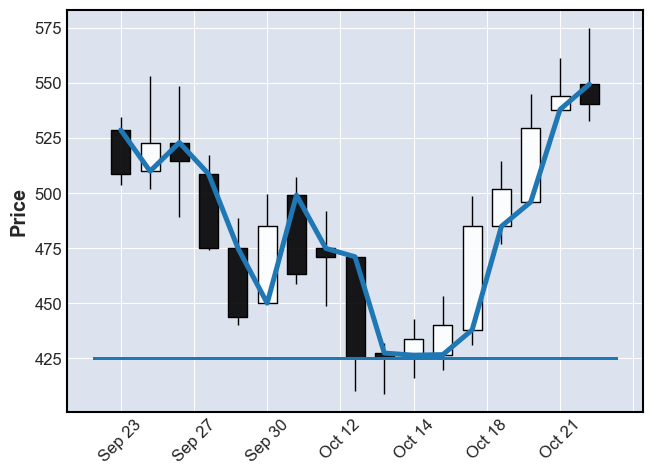

In [69]:
apdict = mpf.make_addplot(dfnm['Open'])
min = dfnm['Close'].min()

mpf.plot(dfnm,type='candle',hlines=[min],addplot=apdict,figscale=1)

## 找到时间段的**最高**和**最低**点并在图表中画出来

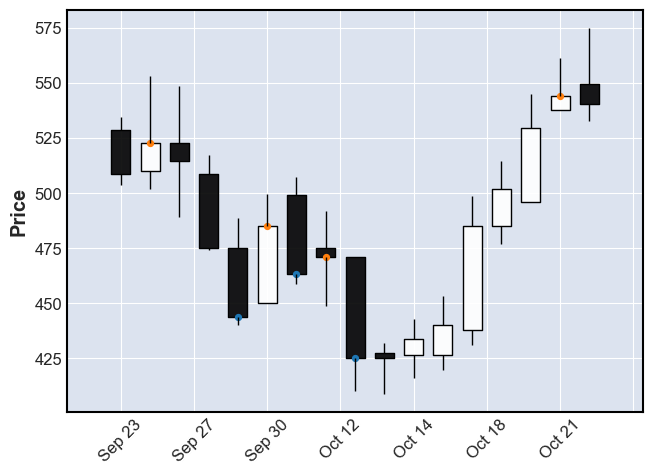

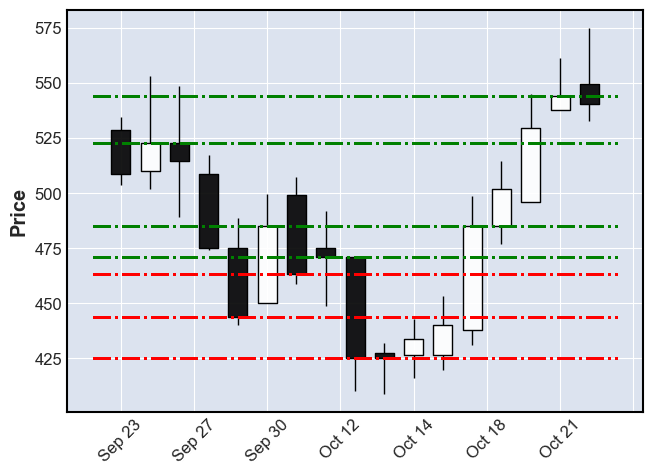

In [115]:
target_1 = 'Close'
target_2 = 'Close'
dfnm['min'] = dfnm[target_1][(dfnm[target_1].shift(1) > dfnm[target_1]) & (dfnm[target_1].shift(-1) > dfnm[target_1])]
dfnm['max'] = dfnm[target_2][(dfnm[target_2].shift(1) < dfnm[target_2]) & (dfnm[target_2].shift(-1) < dfnm[target_2])]

minDict = mpf.make_addplot(dfnm['min'],type='scatter')
maxDict = mpf.make_addplot(dfnm['max'],type='scatter')
mpf.plot(dfnm,type='candle',addplot=[minDict, maxDict])

joined = pd.concat([dfnm['min'], dfnm['max']]).dropna().values.tolist()
joinedColors = np.concatenate((np.full((dfnm['min'].count()), 'r'), np.full((dfnm['max'].count()), 'g'))).tolist()
mpf.plot(dfnm,type='candle',hlines=dict( hlines=joined,colors=joinedColors,linestyle='-.'))

## 想怎么标注就怎么标注

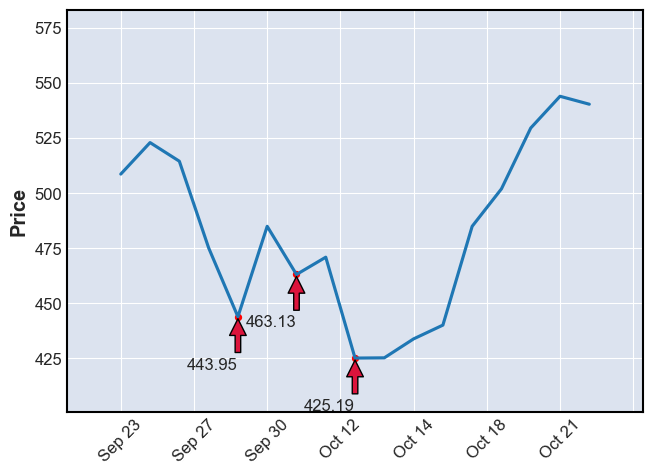

In [193]:
target_1 = 'Close'
# target_2 = 'Close'
dfnm['min'] = dfnm[target_1][(dfnm[target_1].shift(1) > dfnm[target_1]) & (dfnm[target_1].shift(-1) > dfnm[target_1])]
# dfnm['max'] = dfnm[target_2][(dfnm[target_2].shift(1) < dfnm[target_2]) & (dfnm[target_2].shift(-1) < dfnm[target_2])]

minDict = mpf.make_addplot(dfnm['min'],type='scatter', color='r')
fig, axlist = mpf.plot(dfnm,type='line',addplot=[minDict],returnfig=True)

for i in range(len(dfnm['min'])):
    x = i
    y = dfnm['min'][i]
    axlist[0].annotate(np.round(y, decimals=2), xy=(x, y), xycoords='data',
            xytext=(0, -40), textcoords='offset points',
            arrowprops=dict(facecolor='crimson', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

In [208]:
target_1 = 'Close'
# target_2 = 'Close'
dfnm['min'] = dfnm[target_1][(dfnm[target_1].shift(1) > dfnm[target_1]) & (dfnm[target_1].shift(-1) > dfnm[target_1])]
# dfnm.iloc[0]
dfnm[target_1][(dfnm.index > dfnm.iloc[0].index) & (dfnm.index < dfnm['min'][0].index)]

ValueError: Lengths must match